In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\Datasets\iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
del df['Id']

In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* All features are numeric except Species

In [6]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

* Their are no Null values.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


* No outliers in Data

# EDA

In [8]:
col=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

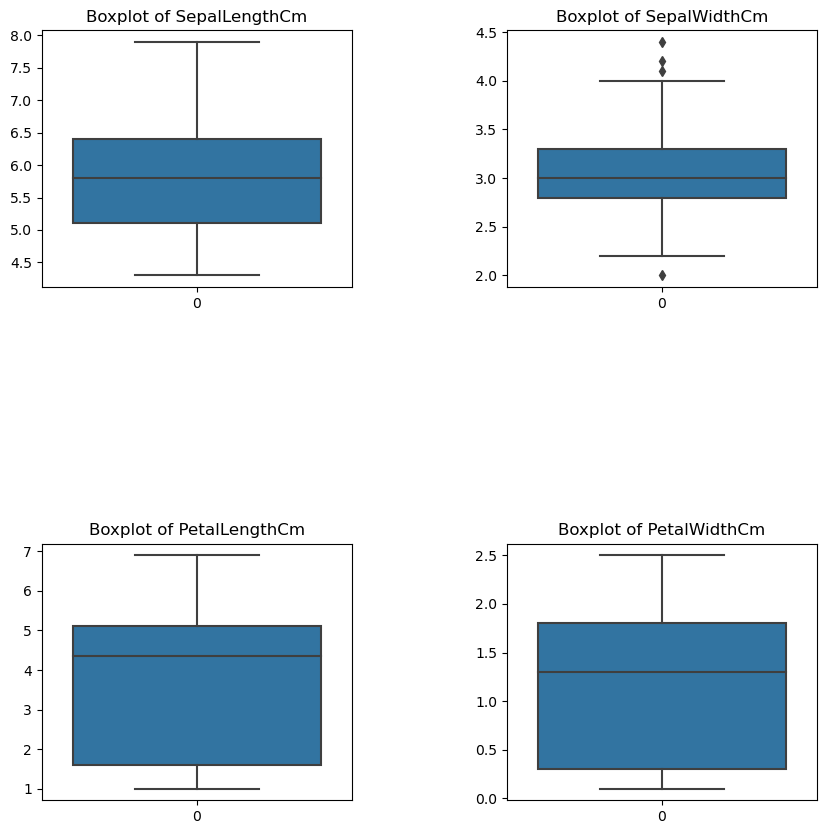

In [9]:
n=0
plt.figure(1,figsize=(10,10))
for i in col:
    n+=1
    plt.subplot(2,2,n)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    sns.boxplot(df[i])
    plt.title("Boxplot of {}".format(i))
plt.show()

* There are some outliers in SepalWidth

C:\Users\admin\AppData\Local\Temp\ipykernel_7800\1121268878.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_7800\1121268878.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_7800\112126887

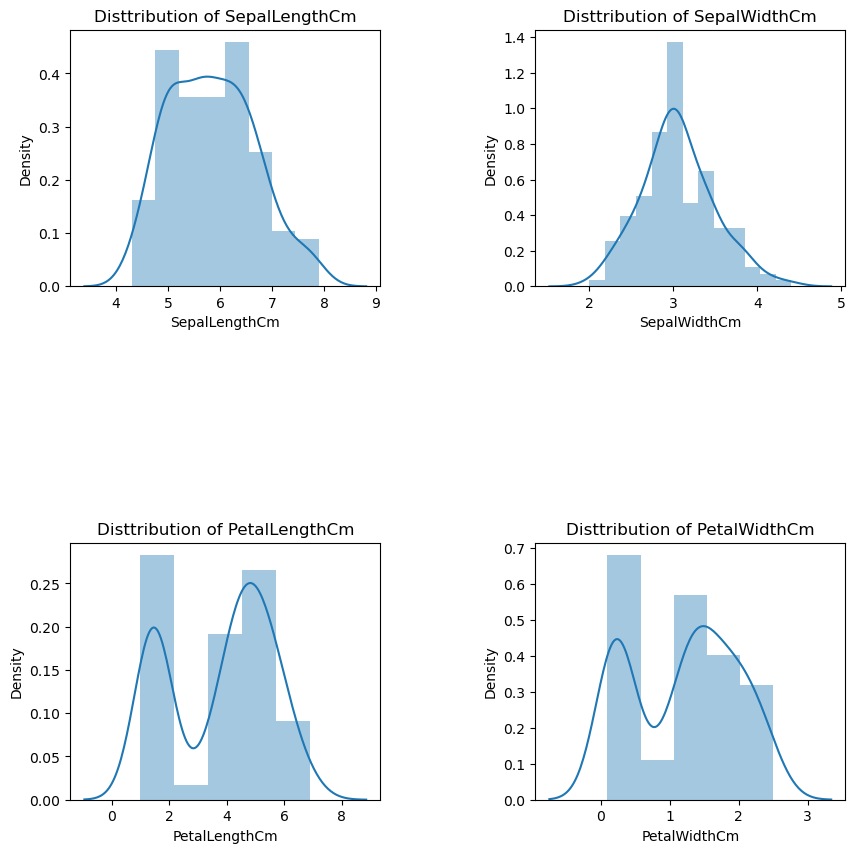

In [10]:
n=0
plt.figure(1,figsize=(10,10))
for i in col:
    n+=1
    plt.subplot(2,2,n)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    sns.distplot(df[i])
    plt.title("Disttribution of {}".format(i))
plt.show()

* SepalLength & Sepal Width have Normal Distribution.

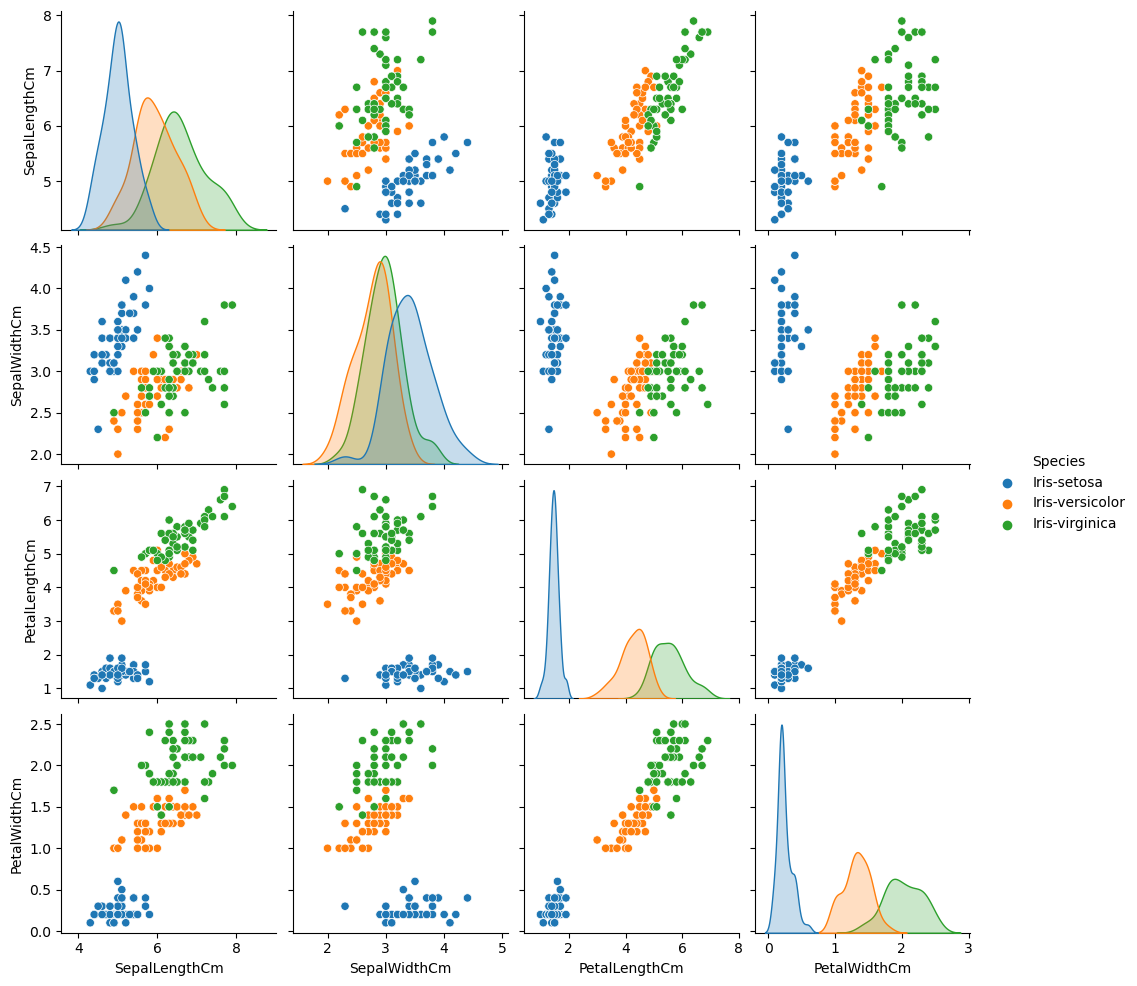

In [11]:
sns.pairplot(df,hue='Species')

* We can eassily classify Species based on Petal Length & Petal Width

<Axes: >

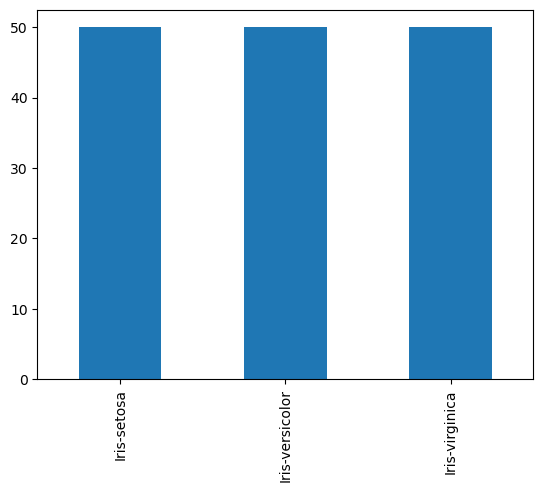

In [12]:
df['Species'].value_counts().plot(kind='bar')

# Splitting Data

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Model Fitting

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt=DecisionTreeClassifier()

In [18]:
model=dt.fit(x_train,y_train)

## Visualizing Decision Tree

In [19]:
from sklearn import tree

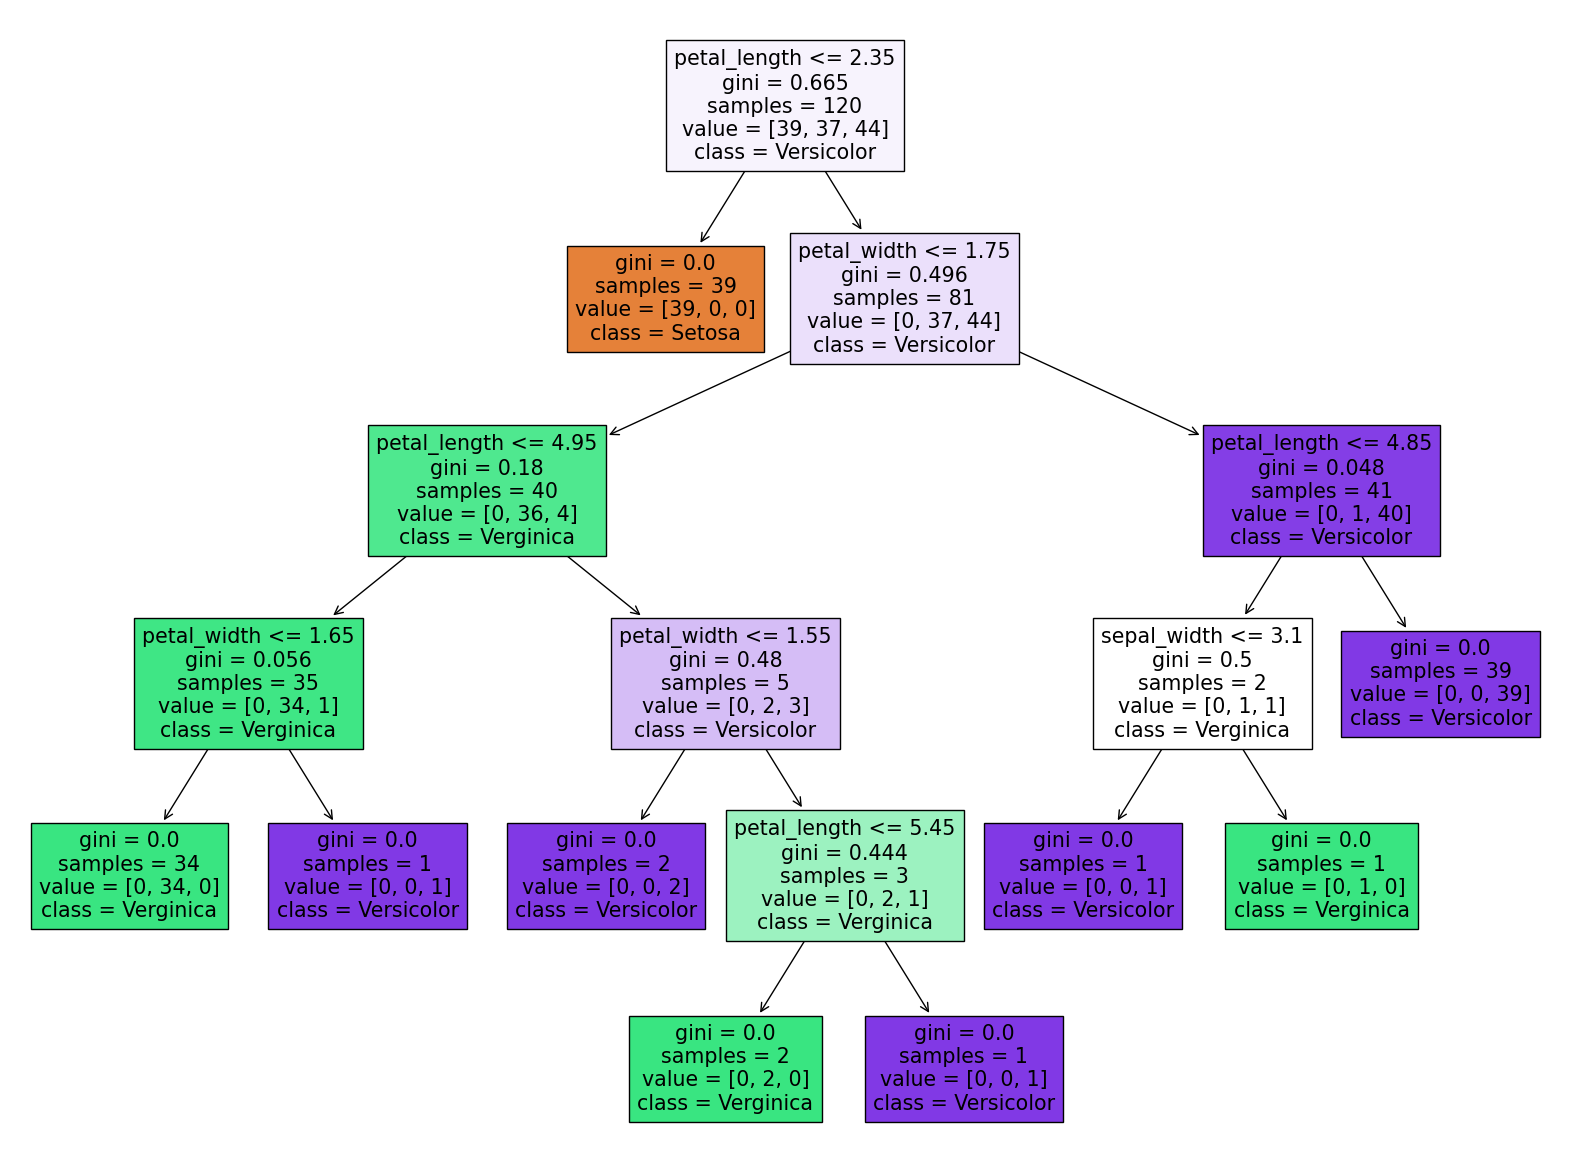

In [20]:
plt.figure(figsize=(20,15))
_=tree.plot_tree(model,
                feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                class_names=['Setosa','Verginica','Versicolor'], 
                filled=True)

## Evaluation of Model

In [21]:
y_pred=dt.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [23]:
print(accuracy_score(y_test,y_pred)*100)

100.0


In [24]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [25]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

